<a href="https://colab.research.google.com/github/MiguelAngel-ht/Cells-Classification/blob/main/01-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# FUNCTION THAT PLOT ALL OF IMAGES TOGETHER
def show_images(images, names):

  fig, axs = plt.subplots(1, len(names), figsize=(4*len(names), 6), constrained_layout=True)

  for i, (ax, img) in enumerate(zip(axs.flat, images)):
    ax.set_title(names[i])
    ax.imshow(img, 'gray')

  plt.show()

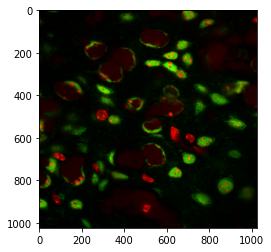

In [3]:
img = cv.imread('63x-NeuN-Hoechst-izq-18 ZEN.tif')
plt.imshow(img)
plt.show()

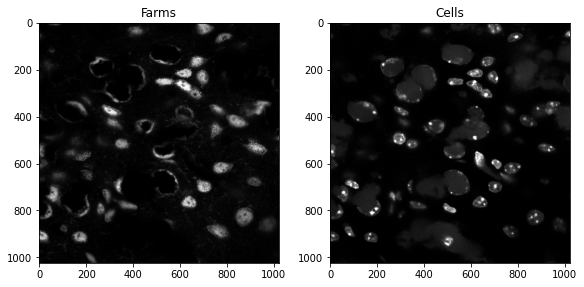

In [4]:
imgF = img[:,:,1] 
imgC = img[:,:,0]
show_images([imgF, imgC], ['Farms', 'Cells'])

In [5]:
# Blurring
imgC_bl = cv.boxFilter(imgC, -1, (5, 5))

# Threshold 
imgC_um = np.copy(imgC_bl)
imgC_um[imgC_um > 17] = 255

# Opening
kernel = np.ones((10,10))     
imgC_op = cv.morphologyEx(imgC_um, cv.MORPH_OPEN, kernel)

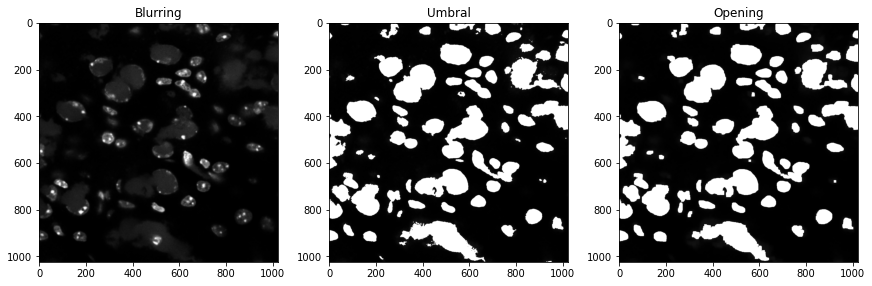

In [6]:
show_images([imgC_bl, imgC_um, imgC_op], ['Blurring', 'Umbral', 'Opening'])

In [28]:
# Logarithm transform
c = 255 / np.log(1 + np.max(imgC))
imgC_log = c * np.log(imgC + 1)
imgC_log = imgC_log.astype('uint8')

# Threshold 
imgC_um2 = np.copy(imgC_log)
imgC_um2[imgC_um2 > 140] = 255
imgC_um2[imgC_um2 != 255] = 0

# Opening and Dilate
kernel = np.ones((2,2),np.uint8) 
imgC_op = cv.morphologyEx(imgC_um2, cv.MORPH_OPEN, kernel)
kernel = np.ones((3,3),np.uint8) 
imgC_dl = cv.dilate(imgC_op, kernel, iterations = 1)

# Opening
kernel = np.ones((10,10))     
imgC_op2 = cv.morphologyEx(imgC_dl, cv.MORPH_OPEN, kernel)

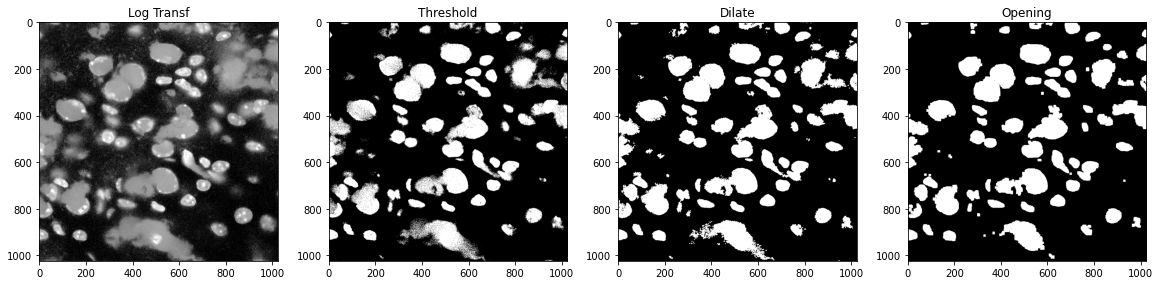

In [33]:
show_images([imgC_log, imgC_um2, imgC_dl, imgC_op2],
            ['Log Transf', 'Threshold', 'Dilate', 'Opening'])

In [50]:
# Farm Image Processing

# Smooting 
kernel = (1 / (5*5)) * np.ones((5,5))
imgF_sm = cv.filter2D(imgF, -1, kernel)

# Thresholding
imgF_th = cv.threshold(imgF_sm, 20, 255, cv.THRESH_BINARY)[1]

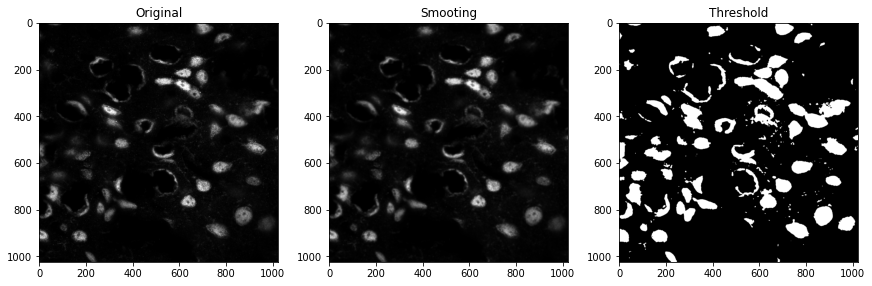

In [52]:
show_images([imgF, imgF_sm, imgF_th], 
            ['Original', 'Smooting', 'Threshold'])

In [ ]:
def Classifier(imgC, imgF, inf, sup, q):
  if q == 'quitar':
    q = False
    return 0

  clas = np.zeros(np.shape(imgC), np.uint8)
  num, label, stats, centroids = cv.connectedComponentsWithStats(imgC, cv.CV_32S)

  


"""
function [Im_Clasificada] = ClasificarCel(Im_Celulas, Im_Farmaco, lim_inf, lim_sup,quitar)

  if ~exist('quitar','var'); quitar=false; end
  [r,c] = size(Im_Celulas);
  Im_Clasificada = zeros(r,c);

  % Etiquetando las celulas
  [L,n] = bwlabel(Im_Celulas,8);

  % Obteniendo el histograma del etiquetado
  figure();
  h_Im = histogram(L,n+1);
  h_Im_val = h_Im.Values;
  h_Im_val = h_Im_val(2:end);

  % Quitando el elemento con mayor area
  if quitar
    liquido_cefa = find(h_Im_val == max(h_Im_val));
    L_aux = L ~= liquido_cefa;
    L = L.*L_aux;
  end
  
  for i= 1:n
    % Eligiendo una celula y obteniendo su area
    Celula = L == i;
    Area_C = h_Im_val(i);
    Farmaco = Celula.*Im_Farmaco;
    Area_F = sum(Farmaco(:));
  
  
      % Evaluando la clase de la celula

    % Clase 3
    if Area_F >= lim_sup*Area_C
      a = 3;
    end
  
    % Clase 2
    if Area_F >= lim_inf*Area_C && Area_F < lim_sup*Area_C
      a = 2;
    end
    
    % Clase 1
    if Area_F < lim_inf*Area_C
      a = 1;
    end
  
    Im_Clasificada = Im_Clasificada + a*Celula;
  end
  
  figure();
  imshow(Im_Clasificada,[]);

end

"""